Scenario:

You are given a dataset containing sales data for a retail store. Your task is to use Pandas to analyze and manipulate the data to answer specific questions.

In [2]:
import pandas as pd

data = {
    'OrderID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Product': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Quantity': [2, 3, 1, 5, 2, 4, 3, 1, 2, 6],
    'Price': [10, 20, 10, 15, 20, 10, 15, 20, 10, 15],
    'Customer': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob', 'Alice', 'Charlie', 'Bob', 'Alice', 'Charlie']
}

df = pd.DataFrame(data)
df


,OrderID,Product,Quantity,Price,Customer
0,101,A,2,10,Alice
1,102,B,3,20,Bob
2,103,A,1,10,Alice
3,104,C,5,15,Charlie
4,105,B,2,20,Bob
5,106,A,4,10,Alice
6,107,C,3,15,Charlie
7,108,B,1,20,Bob
8,109,A,2,10,Alice
9,110,C,6,15,Charlie


Tasks:

    Load the Data:
        Create a Pandas DataFrame from the given data dictionary.

    Basic Exploration:
        Display the first 5 rows of the DataFrame.
        Get the shape of the DataFrame (number of rows and columns).
        Check for missing values in the DataFrame.

    Data Manipulation:
        Add a new column TotalCost that calculates the total cost for each order (Quantity * Price).
        Sort the DataFrame by TotalCost in descending order.

    Aggregation:
        Calculate the total revenue (sum of TotalCost) for the entire dataset.
        Find the average Quantity sold per order.
        Group the data by Customer and calculate the total amount each customer spent.

    Filtering:
        Filter the DataFrame to show only orders where the Quantity is greater than 2.
        Filter the DataFrame to show only orders for the product A.

    Advanced Analysis:
        Find the most popular product (the product with the highest total quantity sold).
        Calculate the total revenue generated by each product.

    Visualization (Optional):
        Use Matplotlib or Seaborn to create a bar plot showing the total revenue by product.


In [3]:
#display the first 5 rows of the dataframe
df.head()

,OrderID,Product,Quantity,Price,Customer
0,101,A,2,10,Alice
1,102,B,3,20,Bob
2,103,A,1,10,Alice
3,104,C,5,15,Charlie
4,105,B,2,20,Bob


In [4]:
# Get the shape of the DataFrame (number of rows and columns).
print(f'Number of rows is {df.shape[0]}')
print(f'Number of column is {df.shape[1]}')

Number of rows is 10
Number of column is 5


In [20]:
#Check for missing values in the DataFrame.
print(df.isnull().sum())

OrderID      0
Product      0
Quantity     0
Price        0
Customer     0
TotalCost    0
dtype: int64


In [9]:
#Add a new column TotalCost that calculates the total cost for each order (Quantity * Price).
df['TotalCost'] = df['Quantity']*df['Price']
df

,OrderID,Product,Quantity,Price,Customer,TotalCost
0,101,A,2,10,Alice,20
1,102,B,3,20,Bob,60
2,103,A,1,10,Alice,10
3,104,C,5,15,Charlie,75
4,105,B,2,20,Bob,40
5,106,A,4,10,Alice,40
6,107,C,3,15,Charlie,45
7,108,B,1,20,Bob,20
8,109,A,2,10,Alice,20
9,110,C,6,15,Charlie,90


In [10]:
#Sort the DataFrame by TotalCost in descending order.
df.sort_values(by=['TotalCost'], ascending=False)

,OrderID,Product,Quantity,Price,Customer,TotalCost
9,110,C,6,15,Charlie,90
3,104,C,5,15,Charlie,75
1,102,B,3,20,Bob,60
6,107,C,3,15,Charlie,45
4,105,B,2,20,Bob,40
5,106,A,4,10,Alice,40
0,101,A,2,10,Alice,20
7,108,B,1,20,Bob,20
8,109,A,2,10,Alice,20
2,103,A,1,10,Alice,10


In [16]:
#Calculate the total revenue (sum of TotalCost) for the entire dataset.
df[['TotalCost']].sum()

TotalCost    420
dtype: int64

In [21]:
#Find the average Quantity sold per order.
df['Quantity'].mean()

2.9

In [27]:
#Group the data by Customer and calculate the total amount each customer spent.
df.groupby(['Customer'])['TotalCost'].sum()

Customer
Alice       90
Bob        120
Charlie    210
Name: TotalCost, dtype: int64

In [29]:
#Filter the DataFrame to show only orders where the Quantity is greater than 2.
df[(df['Quantity'] > 2)]

,OrderID,Product,Quantity,Price,Customer,TotalCost
1,102,B,3,20,Bob,60
3,104,C,5,15,Charlie,75
5,106,A,4,10,Alice,40
6,107,C,3,15,Charlie,45
9,110,C,6,15,Charlie,90


In [30]:
#Filter the DataFrame to show only orders for the product A
df[(df['Product']=='A')]

,OrderID,Product,Quantity,Price,Customer,TotalCost
0,101,A,2,10,Alice,20
2,103,A,1,10,Alice,10
5,106,A,4,10,Alice,40
8,109,A,2,10,Alice,20


In [ ]:
#Find the most popular product (the product with the highest total quantity sold).
df.groupby(['Product'])['TotalCost'].sum().idxmax()

'C'

In [53]:
#Calculate the total revenue generated by each product.
TotalRevenue = df.groupby(['Product'])['TotalCost'].sum()
TotalRevenue

Product
A     90
B    120
C    210
Name: TotalCost, dtype: int64

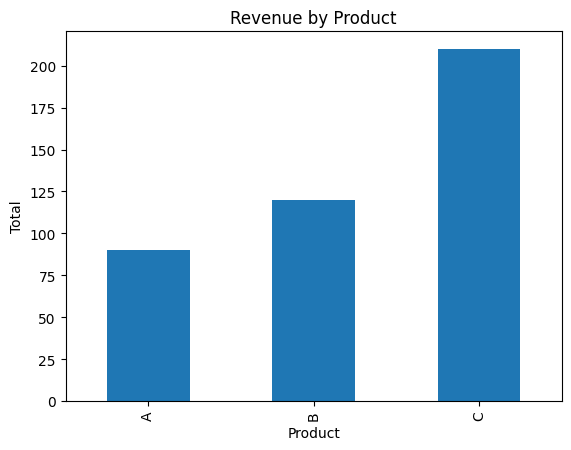

In [56]:
import matplotlib.pyplot as plt
import numpy as np

TotalRevenue.plot(kind='bar', title = 'Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total')
plt.show()